<center> PYTHON-13. Визуализация данных. Закрепление знаний

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [3]:
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
plotly.__version__

'5.11.0'

In [4]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [5]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [6]:
#избавляемся от лишней строки таблицы
churn_data = churn_data.drop(['RowNumber'], axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
churn_df = churn_data.copy()

In [9]:
# узнаем какие столбцы таблицы можно привести к категориальному типу
# создаём пустой список
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in churn_df.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, churn_df[col].nunique(),churn_df[col].dtypes) 
    # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,Gender,2,object
1,HasCrCard,2,int64
2,IsActiveMember,2,int64
3,Exited,2,int64
4,Geography,3,object
5,NumOfProducts,4,int64
6,Tenure,11,int64
7,Age,70,int64
8,CreditScore,460,int64
9,Surname,2932,object


In [10]:
# приводим необходимые столбцы к категориальному типу
max_unique_count = 11 # задаём максимальное число уникальных категорий
for col in churn_df.columns: # цикл по именам столбцов
    if churn_df[col].nunique() < max_unique_count: # проверяем условие 
        churn_df[col] = churn_df[col].astype('category') # преобразуем тип столбца
display(churn_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   Surname          10000 non-null  object  
 2   CreditScore      10000 non-null  int64   
 3   Geography        10000 non-null  category
 4   Gender           10000 non-null  category
 5   Age              10000 non-null  int64   
 6   Tenure           10000 non-null  int64   
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  category
 9   HasCrCard        10000 non-null  category
 10  IsActiveMember   10000 non-null  category
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  category
dtypes: category(6), float64(2), int64(4), object(1)
memory usage: 606.4+ KB


None

##### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

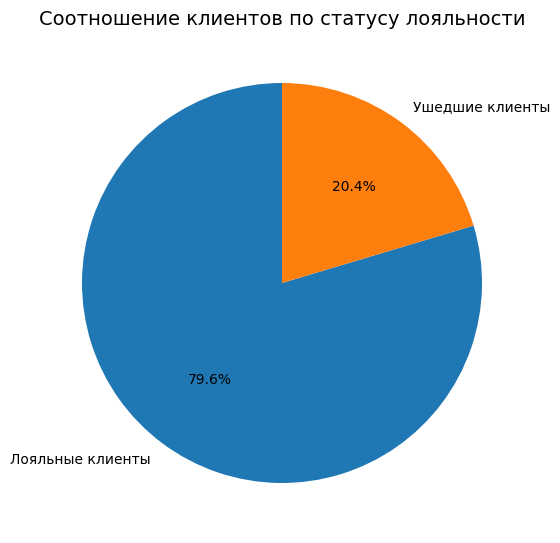

In [11]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes((1, 1, 1, 1))
client_count = churn_df['Exited'].value_counts().sort_values(ascending=False)
pie = ax.pie(
    client_count,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Соотношение клиентов по статусу лояльности', fontsize=14)
plt.show(pie)

Вывод: Лояльных клиентов значительно больше, чем ушедших клиентов, 
значит клинты остаются довольными после предоставленных услуг банка, но предполагаю, что есть шансы улудшить эти показатели.

##### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Text(0, 0.5, 'Статус пользователя')

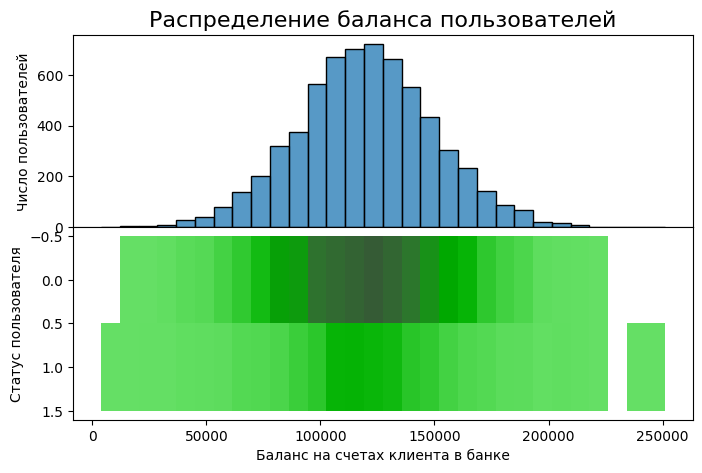

In [12]:
balance_client = churn_df[churn_df['Balance'] > 2500]
# строим два графика
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 5))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=balance_client, 
    x='Balance', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение баланса пользователей', fontsize=16)
histplot1.set_xlabel('Баланс на счетах клиента в банке')
histplot1.set_ylabel('Число пользователей')

histplot2 = sns.histplot(
    data=balance_client,
    x='Balance',
    y='Exited',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Баланс на счетах клиента в банке')
histplot2.set_ylabel('Статус пользователя')

Во-первых, основная часть баланса клиентов сосредоточена в интервале от 70 до 170 тыс., и наибольшее количество клиентов хранит на балансе средства в интервале от 100 до 130 тыс (самый высокий треугольник). Далее при повышении баланса количество клинтов только падает, что вполне соответствует жизненным реалиям — обеспеченных клиентов гораздо меньше, чем клиентов среднего класса.

Во-вторых, как видно из нижней гистограммы, лояльные клиенты (0) имеют схожее с общим распределение — идет постепенное повышение числа клиентов, затем их максимальная частота также наблюдается в интервале от 100 до 130 тыс, после чего идёт постепенное падение частоты (полосы бледнеют при повышении баланса на счетах). По ушедшим клиентам (1) можно сказать, что тенденция более равномерная, наблюдается небольшое повышения количества баланса на счетах в районе от 100 до 130 тыс, но имеется очень небольшое количество клиентов со значительным балансом от 230 до 250 тыс., чего не наблюдается у лояльных клиентов.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Text(0, 0.5, 'Статус пользователя')

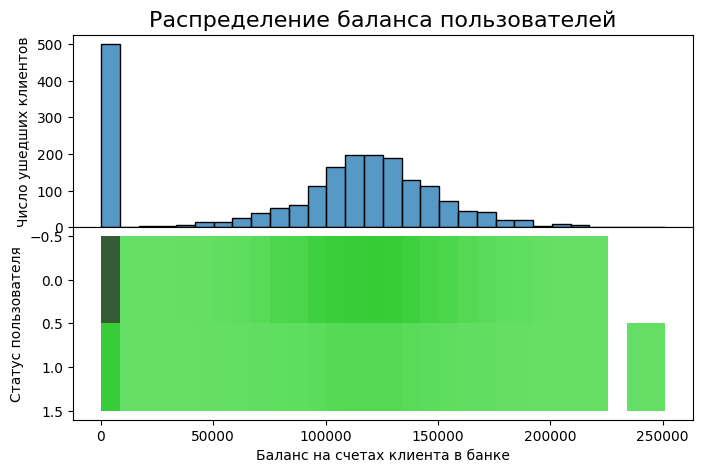

In [13]:
client1 = churn_df[churn_df['Exited'] == 1]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 5))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=client1, 
    x='Balance', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение баланса пользователей', fontsize=16)
histplot1.set_xlabel('Баланс на счетах клиента в банке')
histplot1.set_ylabel('Число ушедших клиентов')

histplot2 = sns.histplot(
    data=churn_df,
    x='Balance',
    y='Exited',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Баланс на счетах клиента в банке')
histplot2.set_ylabel('Статус пользователя')

Если посмотреть на графики баланса клиентов разрезе признака оттока клиентов, то можно заметить разницу, что среди ушедших клиентов есть класс людей, котрые хранили на счетах довольно крупные суммы до 250 тыс., и они по какой-то причине не стали пользоваться в дальнейшем другими услугами банка, не были в этом заинтересованы. Также видно, что преобладает средний уровень обеспеченных людей.

##### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

Text(0, 0.5, 'Статус лояльности клиента')

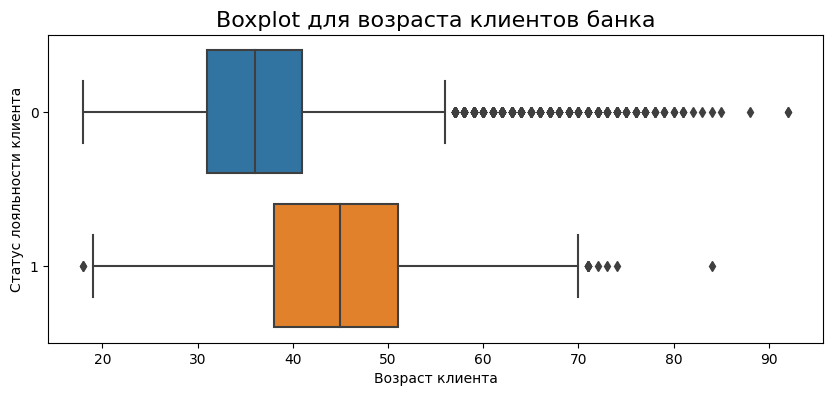

In [14]:
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(data=churn_df, x='Age', y='Exited')
boxplot.set_title('Boxplot для возраста клиентов банка', fontsize=16)
boxplot.set_xlabel('Возраст клиента')
boxplot.set_ylabel('Статус лояльности клиента')

Для группы ушедших клиентов длина ящика с усами состовляет: от 18 до 70 лет (левая и правая граница). Можно увидеть разницу в возрасте между лояльными клиентами и ушедшими, она составляет от 58 до 70 лет. Можно предположить, что клиенты этого возраста могут плохо разбираться в услугах банка и им возможно нужна помощь, чтобы они могли пользоваться и дальше этими услугами, или они не имеют больше финансовой возможности. Медианный возраст лояльных клиентов составляет 36 лет, а медианный возраст для ушедших клиентов равен 45 годам. Нужно обратить внимание на возраст 45 лет, узнать, что их не устраивает в продуктах данного банка.
Число потенциальных выбросов по возрасту среди лояльных клиентов значительно больше, чем в группе ушедших, а также есть молодые люди меньше 18 лет. Возможно можно создать банковские программы, привлекающие пенсионеров и молодых людей к продуктам банка.

##### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

Text(0, 0.5, 'Предполагаемая зарплата')

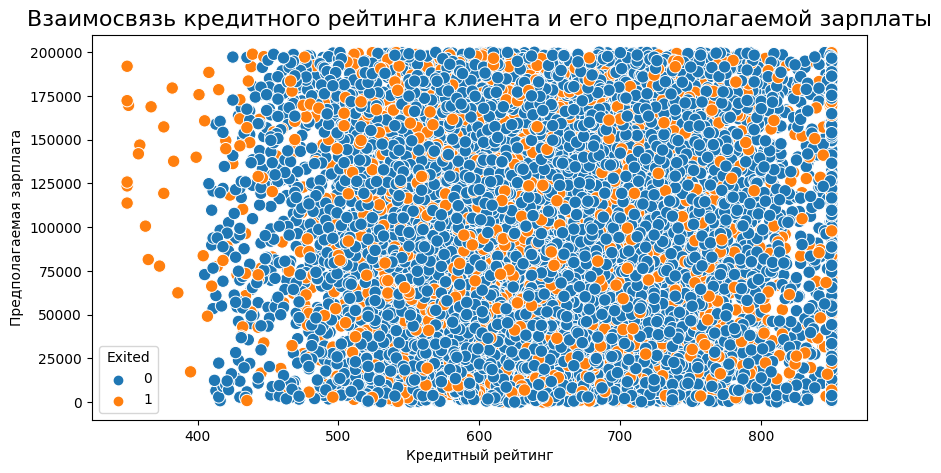

In [15]:
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=churn_df,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    s=80,
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('Кредитный рейтинг')
scatterplot.set_ylabel('Предполагаемая зарплата')

Взаимосвязи кредитного рейтинга клиента и его предполагаемой зарплаты не обнаруживается, виден очень сильный разброс по показателям.

##### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [16]:
# снова меняю тип столбца из категориального на числовой, что вычислить среднее значение оттока клиентов
churn_df['Exited'] = churn_df['Exited'].astype('int8')

Text(0.5, 1.0, 'Сравнение кто чаще уходит, мужчины или женщины?')

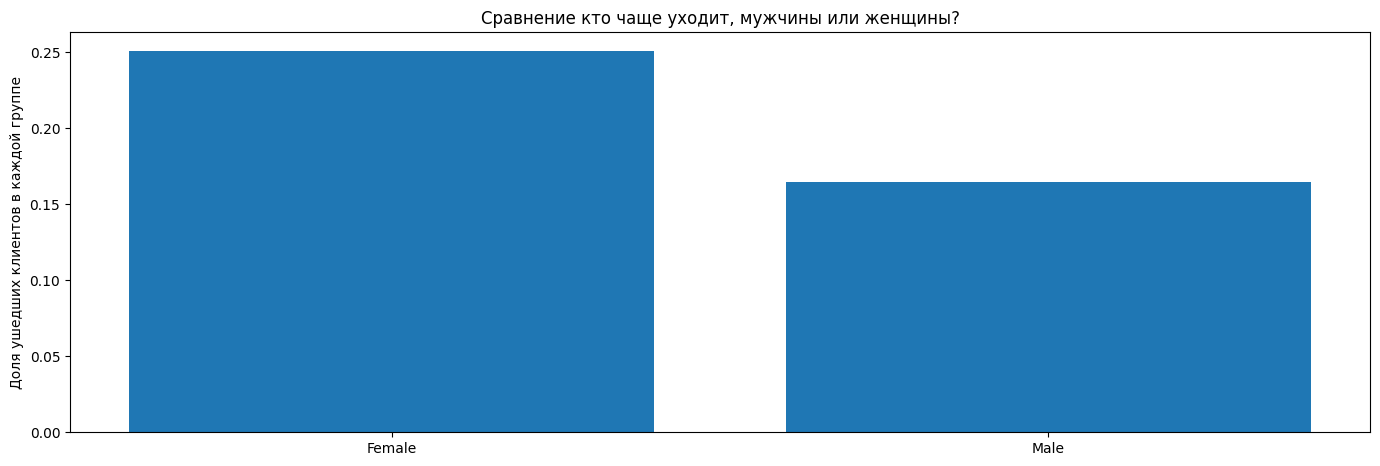

In [17]:
exited_mean = churn_df.groupby('Gender')['Exited'].mean()
#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = exited_mean.index, height = exited_mean);
main_axes.set_ylabel('Доля ушедших клиентов в каждой группе')
main_axes.set_title('Сравнение кто чаще уходит, мужчины или женщины?')

Можно сделать вывод, что доля ушедших женжин больше, чем ушедших мужчин. Я предполагаю, что основная доля финансов сосредоточена у мужчин.

##### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [18]:
churn_df.pivot_table(
    values='CustomerId',
    index='NumOfProducts',
    columns='Exited',
    aggfunc='count'
).iplot(kind='bar',
        histnorm='percent',
        barmode='overlay',
        xTitle='Услуги банка',
        yTitle='Количество клиентов', 
        title='Отток клиентов в зависимости от приобретенных услуг банка'
        )

На основании построенной диаграммы наглядно видно, что ушедшие клиенты почти не пользовались услугой 2, в то время как большинство лояльных клиентов хорошо пользуются данной услугой, и она самая популярная. Возможно нужно больше заинтересовать клиентов данной услугой и услугой №1, чтобы они стали лояльными. Если посмотреть на услуги под №3 и №4, то ими пользовались практически только ушедшие клинты. Можно сделать вывод, что данные услуги разовые, и они не приносят интерес дальше пользоваться другими услугами банка.

##### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [19]:
churn_df.pivot_table(
    values='CustomerId',
    index='Exited',
    columns='IsActiveMember',
    aggfunc='count'
).iplot(kind='bar',
        histnorm='percent',
        xTitle='Статус клиента (лояльные-0 и ушедшие-1)',
        yTitle='Количество клиентов', 
        title='Отток клиентов в зависимости от их активности (да-1 и нет-0)'
        )

На данном графике видно, что активных клиентов значительно больше, чем неактивных среди лояльных пользователей услуг банка, и наоборот значительно меньше активных среди ушедших клиентов банка. Соответственно можно сделать вывод, что нужно повышать уровень активности пользователей за счет напоминаний и уведомлений от банка, заинтересовывать новыми продуктами банка и интересными предложениями, чтобы понизить уровень ушедших клиентов.

##### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [26]:
# вычисляем долю ушедших клиентов по каждой стране
mask1 = churn_df['Exited'] == 1
mask0 = churn_df['Exited'] == 0
grouped1 = churn_df[mask1].groupby(by='Geography')['CustomerId'].count()
grouped0 = churn_df[mask0].groupby(by='Geography')['CustomerId'].count()
part_lost = (grouped1 / (grouped1 + grouped0) * 100).round(2)


In [21]:
#строим график
fig = px.choropleth(
    data_frame=part_lost, #DataFrame
    locations=part_lost.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color=part_lost.values, #от чего зависит цвет
    #animation_frame=part_lost.values, #анимационный бегунок
    range_color=[0, 100], #диапазон цвета
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

По данным карты видно, что доля ушедших клиентов больше всего в Германии, а во Франции и Испании в два раза меньше и практически равна. Возможно условия предоставления услуг или отношение к клиентам в этих странах разные.

##### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [22]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [23]:
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)
display(churn_df['CreditScoreCat'].unique())

array(['Fair', 'Poor', 'Good', 'Excellent', 'Very_Poor'], dtype=object)

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

In [28]:
pivot1 = churn_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
).round(2)

##### На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(50.722222222222214, 0.5, 'Кредитный рейтинг')

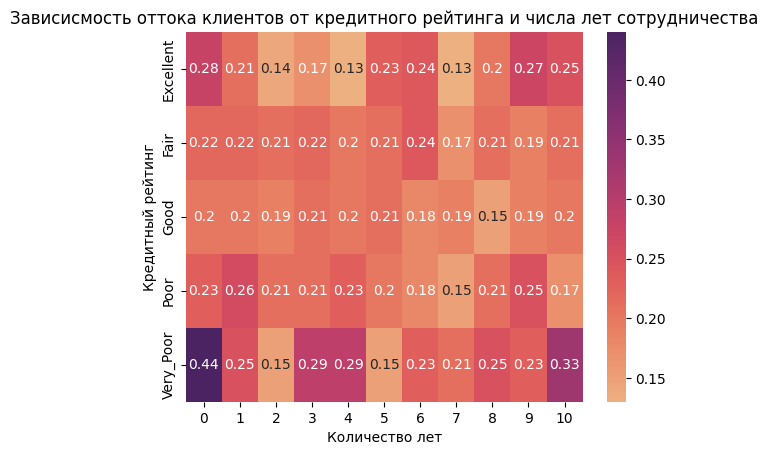

In [29]:
fig = plt.figure()
ax = sns.heatmap(data=pivot1, cmap='flare', annot=True)
ax.set_title('Зависисмость оттока клиентов от кредитного рейтинга и числа лет сотрудничества')
ax.set_xlabel('Количество лет')
ax.set_ylabel('Кредитный рейтинг')

По тепловой карте можно понять, что чаще всего уходят клиенты с низким кредитным рейтингом 'Very Poor', которые пользуются услугами банка меньше одного года (квадратик на тепловой карте самый темный), а также заметно выражены места на карте от 1 до 2 лет, от 2 до 5 лет и от 6 до 10 лет включительно. С превосходным рейтингом также заметны потемнения на протяжении всех лет пользования услугами. Средняя часть тепловой карты довольно ровная и стабильная по цветам, что говорит о том, что ушедших клиентов значительно меньше со средним кредитным рейтингом.